In [1]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
from functools import partial
from matplotlib.animation import FuncAnimation

from single_layer_networks.deltarule import Neuron

In [59]:
X = load_iris().data
X = X[:100, [2,3]]
y = load_iris().target[:100]

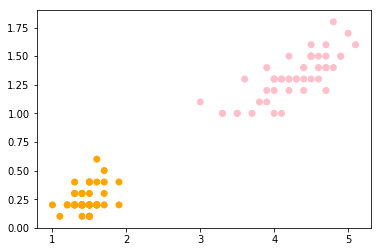

In [60]:
c = ListedColormap(['orange', 'pink'])
plt.scatter(X[:, 0], X[:, 1], cmap=c, c=y)
plt.show()

In [61]:
def plot_line(coefs):
    """
    Рисует линию
    :params coefs: (weights, bias); weights.shape = (2, 1), bias = число
    """
    w, bias = coefs
    a, b = - w[0][0] / w[1][0], - bias / w[1][0]
    xx = np.linspace(*plt.xlim())
    line.set_data(xx, a*xx + b)

In [62]:
def step_by_step(n, X, y, max_steps=1e6, eps = 0.001):
    """
    Последовательно обучает нейрон
    :params n: Нейрон
    """
    i = 0
    
    while i < max_steps:
        i += 1
        err_sum = 0
        for example, answer in zip(X, y):
            example = np.array([example])
            answer = np.array([answer])
            z, error = n.fit(example, answer,eta=0.1, bunch_size=1, num_epochs=1)
            err_sum += error
            yield n._w[:2], n._w[2]
        if err_sum < eps:
            break
    for _ in range(20): yield n._w[:2], n._w[2]

<IPython.core.display.Javascript object>


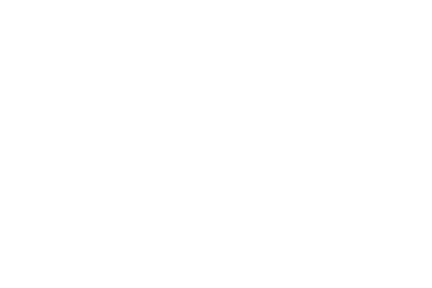

<IPython.core.display.Javascript object>


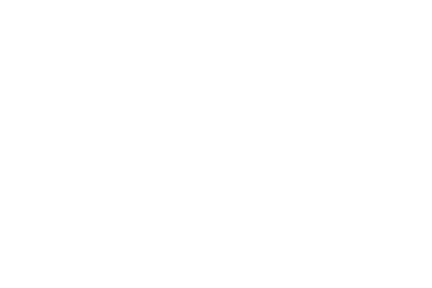

Traceback (most recent call last):
  File "C:\Users\Zhenia\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "C:\Users\Zhenia\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "C:\Users\Zhenia\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [67]:
%matplotlib notebook
%matplotlib nbagg
fig = plt.figure()
c = ListedColormap(['orange', 'pink'])
plt.scatter(X[:, 0], X[:, 1], cmap=c, c=y)
line, = plt.plot([],[], color='black', linewidth=1)
n = Neuron(2)
weights_ani = partial(step_by_step, n=n, X=X, y=y)
ani = FuncAnimation(fig, func=plot_line, frames=weights_ani, blit=False, interval=10, repeat=True)
plt.show()

In [68]:
def step_by_step_errors(n, X, y, max_steps=1e6, eps = 0.001):
    """
    Последовательно обучает нейрон
    :params n: Нейрон
    """
    i = 0
    
    while i < max_steps:
        i += 1
        err_sum = 0
        for example, answer in zip(X, y):
            example = np.array([example])
            answer = np.array([answer])
            z, error = n.fit(example, answer,eta=0.1, bunch_size=1, num_epochs=1)
            err_sum += error
            yield error
        if err_sum < eps:
            break

# Ошибка на каждом примере

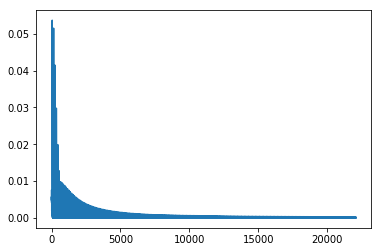

In [69]:
%matplotlib inline
n = Neuron(2)
errors = []
for err in step_by_step_errors(n, X, y):
    errors.append(err)
plt.plot(errors)
plt.show()

In [70]:
print(n._w)

[[ 1.78931913]
 [ 2.65156756]
 [-6.41738541]]


# То же в другом масштабе

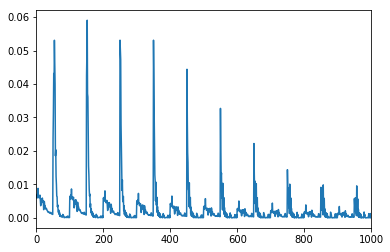

In [18]:
n = Neuron(2)
errors = []
for err in step_by_step_errors(n, X, y, max_steps=100):
    errors.append(err)
f = plt.figure()
plt.plot(errors)
plt.xlim([0,1000])
plt.show()

In [19]:
def step_by_step_errors_sum(n, X, y, max_steps=1e6, eps = 0.001):
    """
    Последовательно обучает нейрон
    :params n: Нейрон
    """
    i = 0
    
    while i < max_steps:
        i += 1
        err_sum = 0
        for example, answer in zip(X, y):
            example = np.array([example])
            answer = np.array([answer])
            z, error = n.fit(example, answer,eta=0.1, bunch_size=1, num_epochs=1)
            err_sum += error
        yield err_sum 
        if err_sum < eps:
            break

# Средняя ошибка на всех примерах

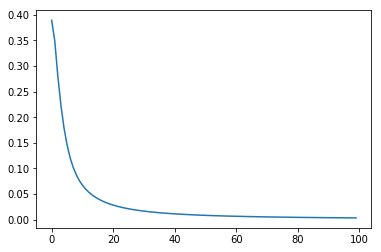

In [20]:
n = Neuron(2)
errors = []
for err in step_by_step_errors_sum(n, X, y, max_steps=100):
    errors.append(err)
f = plt.figure()
plt.plot(errors)
plt.show()

# Квадратичная функция ошибки для Нейрона любого типа

In [44]:
def J_quadratic(n, X, y):
    try:
        if y.shape[1] > 1:
            y = y.reshape((y.shape[1], 1))
    except:
        pass
    return 0.5 * np.mean((n.predict(X) - y) **2)

# Визуализация Квадратичной Целевой Функции для сигмоидального нейрона

In [49]:
def J_by_weights(weights, n, X, y , bias):
    """
    Считает значение целевой функции для данных весов.
    :params X: (n,1)
    :params bias: число
    """
    weights = weights.reshape((weights.shape[0], 1))
    weights = np.vstack((weights, bias))
    neuron = Neuron(n)
    neuron._w = weights
    return J_quadratic(neuron, X, y)

In [54]:
from ipywidgets import interact, IntSlider, FloatSlider
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as p3

In [57]:
%matplotlib inline

max_b = 40
min_b = -40
max_w1 = 40
min_w1 = -40
max_w2 = 40
min_w2 = -40

g_bias = 0 # график номер 2 будет при первой генерации по умолчанию иметь то значение b, которое выставлено в первом
X_corrupted = X.copy()
y_corrupted = y.copy()
y_corrupted = y.reshape((len(y), 1))

@interact(fixed_bias=FloatSlider(min=min_b, max=max_b, continuoues_update=False))

def visualize(fixed_bias):
    xlim = (min_w1, max_w1)
    ylim = (min_w2, max_w2)
    xx = np.linspace(*xlim, num=101)
    yy = np.linspace(*ylim, num=101)
    xx, yy = np.meshgrid(xx, yy)
    points = np.stack([xx, yy], axis=2)
    calculate_weights = partial(J_by_weights, n=2, X=X_corrupted, y=y_corrupted, bias=fixed_bias)
    J_values = np.apply_along_axis(calculate_weights, -1, points)
    fig = plt.figure(figsize=(16,5))
    # сначала 3D-график целевой функции
    ax_1 = fig.add_subplot(1, 2, 1, projection='3d')
    surf = ax_1.plot_surface(xx, yy, J_values, alpha=0.3)
    plt.show()

A Jupyter Widget